In [2]:
import pandas as pd

df = pd.read_csv('https://www.ishelp.info/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [5]:
df.min()

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges       1121.87
dtype: object

In [6]:
df.max()

age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges       63770.4
dtype: object

In [7]:
df.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [39]:
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [9]:
df.quantile(.25)

age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64

In [10]:
df.quantile(.50)

age           39.000
bmi           30.400
children       1.000
charges     9382.033
Name: 0.5, dtype: float64

In [11]:
df.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [13]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [14]:
df.std()

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

In [15]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [16]:
df.kurt()

age        -1.245088
bmi        -0.050732
children    0.202454
charges     1.606299
dtype: float64

In [35]:
df_output = pd.DataFrame(columns=['count', 'unique', 'missing', 'min', '25%', 'median', 
                                  '75%', 'max', 'mode', 'mean', 'std', 'skew', 'kurt'])

for col in df:
  if pd.api.types.is_numeric_dtype(df[col].dtype):
    df_output.loc[col] = [df[col].count(), df[col].nunique(), df[col].isnull().sum(), df[col].min(), 
                          df[col].quantile(.25), df[col].median(), df[col].quantile(.75), df[col].max(),
                          df[col].mode().values[0], df[col].mean(), df[col].std(), df[col].skew(), df[col].kurt()]
  else:
    df_output.loc[col] = [df[col].count(), df[col].nunique(), df[col].isnull().sum(), '-', '-', '-', '-', '-',
                          df[col].mode().values[0], '-', '-', '-', '-']

df_output


,count,unique,missing,min,25%,median,75%,max,mode,mean,std,skew,kurt
age,1338.0,47.0,0.0,18,27,39,51,64,18,39.207,14.05,0.0556725,-1.24509
sex,1338.0,2.0,0.0,-,-,-,-,-,male,-,-,-,-
bmi,1338.0,548.0,0.0,15.96,26.2963,30.4,34.6938,53.13,32.3,30.6634,6.09819,0.284047,-0.0507315
children,1338.0,6.0,0.0,0,0,1,2,5,0,1.09492,1.20549,0.93838,0.202454
smoker,1338.0,2.0,0.0,-,-,-,-,-,no,-,-,-,-
region,1338.0,4.0,0.0,-,-,-,-,-,southeast,-,-,-,-
charges,1338.0,1337.0,0.0,1121.87,4740.29,9382.03,16639.9,63770.4,1639.56,13270.4,12110,1.51588,1.6063


<function matplotlib.pyplot.show>

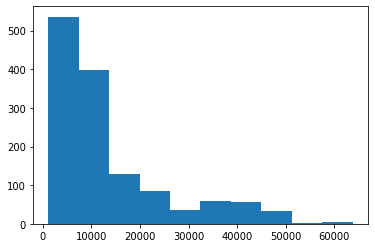

In [40]:
 %matplotlib inline
from matplotlib import pyplot as plt

plt.hist(df['charges'])
plt.show

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


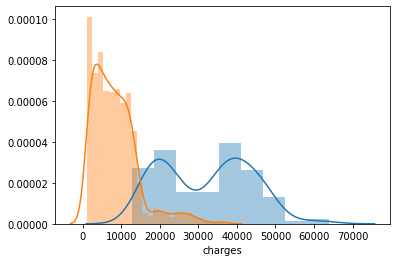

In [41]:
import pandas as pd
import seaborn as sns

ax = sns.distplot(df[df['smoker']=='yes'].charges)
ax = sns.distplot(df[df['smoker']=='no'].charges)